<a href="https://colab.research.google.com/github/vishnuv0007/Python_Practice_problems/blob/main/de_demo_20_july_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Various Datasets

In [ ]:
#database, csv, txt, json
# CSV
# Name,Age,Salary
# Alice,28,50000
# Bob,35,60000
# Charlie,22,45000
import pandas as pd
# Read CSV file
df = pd.read_csv('https://raw.githubusercontent.com/tech4alltraining/aiml/main/heart_failure_raw.csv')
# Display the first few rows of the dataset
df.head()

In [ ]:
#TXT

# Name    Age     Salary
# Alice   28      50000
# Bob     35      60000
# Charlie 22      45000
import pandas as pd
# Scenario: Dataset is in a text file with a custom delimiter (e.g., tab-separated)
df_text = pd.read_csv('your_dataset.txt', delimiter='\t')

In [ ]:
#JSON
# [
#   {"Name": "Alice", "Age": 28, "Salary": 50000},
#   {"Name": "Bob", "Age": 35, "Salary": 60000},
#   {"Name": "Charlie", "Age": 22, "Salary": 45000}
# ]
import pandas as pd

# Read JSON file
df = pd.read_json('your_dataset.json')

# Display the first few rows of the dataset
print(df.head())

###Head Failure Disease Preditction Dataset

In [ ]:
# https://raw.githubusercontent.com/tech4alltraining/aiml/main/heart_failure_raw.csv
import pandas as pd
# Read CSV file
df = pd.read_csv('https://raw.githubusercontent.com/tech4alltraining/aiml/main/heart_failure_raw.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,treatment_type,DEATH_EVENT
0,75.0,No,582,No,20.0,Yes,265000.00,1.9,130,Yes,No,4,Other,Yes
1,55.0,No,7861,No,38.0,No,263358.03,1.1,136,Yes,No,6,Lifestyle,Yes
2,65.0,No,146,No,NaN,No,162000.00,1.3,129,Yes,Yes,7,Medication,Yes
3,50.0,Yes,111,No,20.0,No,210000.00,1.9,137,Yes,No,7,Surgery,Yes
4,65.0,Yes,160,Yes,20.0,No,327000.00,2.7,116,No,No,8,Medication,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       284 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         284 non-null    float64
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          284 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  treatment_type            299 non-null    object 
 13  DEATH_EVENT               299 non-null    object 
dtypes: float64

###Data Preprocessing

In [ ]:
# prompt: get me count of null values in each column

df.isnull().sum()



age                         15
anaemia                      0
creatinine_phosphokinase     0
diabetes                     0
ejection_fraction           15
high_blood_pressure          0
platelets                    0
serum_creatinine            15
serum_sodium                 0
sex                          0
smoking                      0
time                         0
treatment_type               0
DEATH_EVENT                  0
dtype: int64

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols


Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

In [ ]:
categorical_cols

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'treatment_type', 'DEATH_EVENT'],
      dtype='object')

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())
df.isnull().sum()

# Handle missing values (replace with median for numerical columns)
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
treatment_type              0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# prompt: find outliers and fill with mean
#AGE  150, 160

import numpy as np
# Calculate IQR for numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print(outliers)

# Replace outliers with mean
for col in numerical_cols:
    mean_val = df[col].mean()
    df[col] = np.where((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), mean_val, df[col])


age                          4
creatinine_phosphokinase    29
ejection_fraction            2
platelets                   21
serum_creatinine            30
serum_sodium                 4
time                         0
dtype: int64


In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,treatment_type,DEATH_EVENT
0,75.0,No,582.000000,No,20.0,Yes,265000.000000,1.900000,130.000000,Yes,No,4.0,Other,Yes
1,55.0,No,581.839465,No,38.0,No,263358.030000,1.100000,136.000000,Yes,No,6.0,Lifestyle,Yes
2,65.0,No,146.000000,No,38.0,No,162000.000000,1.300000,129.000000,Yes,Yes,7.0,Medication,Yes
3,50.0,Yes,111.000000,No,20.0,No,210000.000000,1.900000,137.000000,Yes,No,7.0,Surgery,Yes
4,65.0,Yes,160.000000,Yes,20.0,No,327000.000000,1.524448,136.625418,No,No,8.0,Medication,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61.000000,Yes,38.0,Yes,155000.000000,1.100000,143.000000,Yes,Yes,270.0,Surgery,No
295,55.0,No,581.839465,No,38.0,No,270000.000000,1.200000,139.000000,No,No,271.0,Lifestyle,No
296,45.0,No,581.839465,Yes,60.0,No,263358.029264,0.800000,138.000000,No,No,278.0,Lifestyle,No
297,45.0,No,581.839465,No,38.0,No,140000.000000,1.100000,140.000000,Yes,Yes,280.0,Medication,No


In [ ]:
# Normalize numerical features (using MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,treatment_type,DEATH_EVENT
0,0.648148,No,0.470539,No,0.117647,Yes,0.523529,0.87500,0.217391,Yes,No,0.000000,Other,Yes
1,0.277778,No,0.470404,No,0.470588,No,0.518700,0.37500,0.478261,Yes,No,0.007117,Lifestyle,Yes
2,0.462963,No,0.103535,No,0.470588,No,0.220588,0.50000,0.173913,Yes,Yes,0.010676,Medication,Yes
3,0.185185,Yes,0.074074,No,0.117647,No,0.361765,0.87500,0.521739,Yes,No,0.010676,Surgery,Yes
4,0.462963,Yes,0.115320,Yes,0.117647,No,0.705882,0.64028,0.505453,No,No,0.014235,Medication,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.407407,No,0.031987,Yes,0.470588,Yes,0.200000,0.37500,0.782609,Yes,Yes,0.946619,Surgery,No
295,0.277778,No,0.470404,No,0.470588,No,0.538235,0.43750,0.608696,No,No,0.950178,Lifestyle,No
296,0.092593,No,0.470404,Yes,0.901961,No,0.518700,0.18750,0.565217,No,No,0.975089,Lifestyle,No
297,0.092593,No,0.470404,No,0.470588,No,0.155882,0.37500,0.652174,Yes,Yes,0.982206,Medication,No


In [ ]:
# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,treatment_type,DEATH_EVENT
0,0.648148,0,0.470539,0,0.117647,1,0.523529,0.87500,0.217391,1,0,0.000000,2,1
1,0.277778,0,0.470404,0,0.470588,0,0.518700,0.37500,0.478261,1,0,0.007117,0,1
2,0.462963,0,0.103535,0,0.470588,0,0.220588,0.50000,0.173913,1,1,0.010676,1,1
3,0.185185,1,0.074074,0,0.117647,0,0.361765,0.87500,0.521739,1,0,0.010676,3,1
4,0.462963,1,0.115320,1,0.117647,0,0.705882,0.64028,0.505453,0,0,0.014235,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.407407,0,0.031987,1,0.470588,1,0.200000,0.37500,0.782609,1,1,0.946619,3,0
295,0.277778,0,0.470404,0,0.470588,0,0.538235,0.43750,0.608696,0,0,0.950178,0,0
296,0.092593,0,0.470404,1,0.901961,0,0.518700,0.18750,0.565217,0,0,0.975089,0,0
297,0.092593,0,0.470404,0,0.470588,0,0.155882,0.37500,0.652174,1,1,0.982206,1,0


###Handling Class Imbalance using Sampling Techniques

In [ ]:
# Display class distribution before addressing class imbalance
print("Class Distribution")
class_counts = df['DEATH_EVENT'].value_counts()
print(class_counts)

Class Distribution
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [ ]:
#C1 - No - 203 (majority)
#c2 - Yes - 96 (minority)

#Undersampling
#c1 - No - 96 (minority)
#c2 - Yes - 96 (minority)
#Oversmpling
#c1 - No - 203
#c2 - Yes - 203
#SMOTE
#c1 - No - 203
#c2 - Yes - 203

###Extracting features and labels

In [ ]:
y = df['DEATH_EVENT'] #Labels / Target variable
X = df.drop(columns=['DEATH_EVENT'])  #features
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,treatment_type
0,0.648148,0,0.470539,0,0.117647,1,0.523529,0.87500,0.217391,1,0,0.000000,2
1,0.277778,0,0.470404,0,0.470588,0,0.518700,0.37500,0.478261,1,0,0.007117,0
2,0.462963,0,0.103535,0,0.470588,0,0.220588,0.50000,0.173913,1,1,0.010676,1
3,0.185185,1,0.074074,0,0.117647,0,0.361765,0.87500,0.521739,1,0,0.010676,3
4,0.462963,1,0.115320,1,0.117647,0,0.705882,0.64028,0.505453,0,0,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.407407,0,0.031987,1,0.470588,1,0.200000,0.37500,0.782609,1,1,0.946619,3
295,0.277778,0,0.470404,0,0.470588,0,0.538235,0.43750,0.608696,0,0,0.950178,0
296,0.092593,0,0.470404,1,0.901961,0,0.518700,0.18750,0.565217,0,0,0.975089,0
297,0.092593,0,0.470404,0,0.470588,0,0.155882,0.37500,0.652174,1,1,0.982206,1


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [ ]:
#Imbalance  C0 - 203, C1-96
X_imbalanced = X #(203+96) = 299
y_imbalanced = y  #(203+96) = 299
# Apply Random Over-sampling
#c0 - majority 203
#c1 - minority 96 +107 = 203
#over
#c0-203
#c1-203
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_imbalanced, y_imbalanced)
X_ros.shape, y_ros.shape  #(406, 406)

X_ros

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,treatment_type
0,0.648148,0,0.470539,0,0.117647,1,0.523529,0.87500,0.217391,1,0,0.000000,2
1,0.277778,0,0.470404,0,0.470588,0,0.518700,0.37500,0.478261,1,0,0.007117,0
2,0.462963,0,0.103535,0,0.470588,0,0.220588,0.50000,0.173913,1,1,0.010676,1
3,0.185185,1,0.074074,0,0.117647,0,0.361765,0.87500,0.521739,1,0,0.010676,3
4,0.462963,1,0.115320,1,0.117647,0,0.705882,0.64028,0.505453,0,0,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.185185,1,0.122054,0,0.470588,1,0.555882,0.37500,0.521739,1,0,0.024911,2
402,0.370370,0,0.470539,1,0.470588,1,0.518700,0.06250,0.565217,1,1,0.128114,3
403,0.740741,0,0.658249,0,0.470588,0,0.518700,0.37500,0.391304,1,0,0.373665,1
404,0.740741,0,0.658249,0,0.470588,0,0.518700,0.37500,0.391304,1,0,0.373665,1


In [ ]:
y_ros

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    1
403    1
404    1
405    1
Name: DEATH_EVENT, Length: 406, dtype: int64

In [ ]:
# Display class distribution after oversampling
print("\nClass Distribution After Random Over-sampling:")
print(y_ros.value_counts())


Class Distribution After Random Over-sampling:
DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Apply Random Under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_imbalanced, y_imbalanced)
#under
#c0-96
#c1-96
# Display class distribution after undersampling
print("\nClass Distribution After Random Under-sampling:")
print(y_rus.value_counts())


Class Distribution After Random Under-sampling:
DEATH_EVENT
0    96
1    96
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_imbalanced, y_imbalanced)
# Display class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_smote.value_counts())


Class Distribution After SMOTE:
DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


###Feature Selection Tehniques

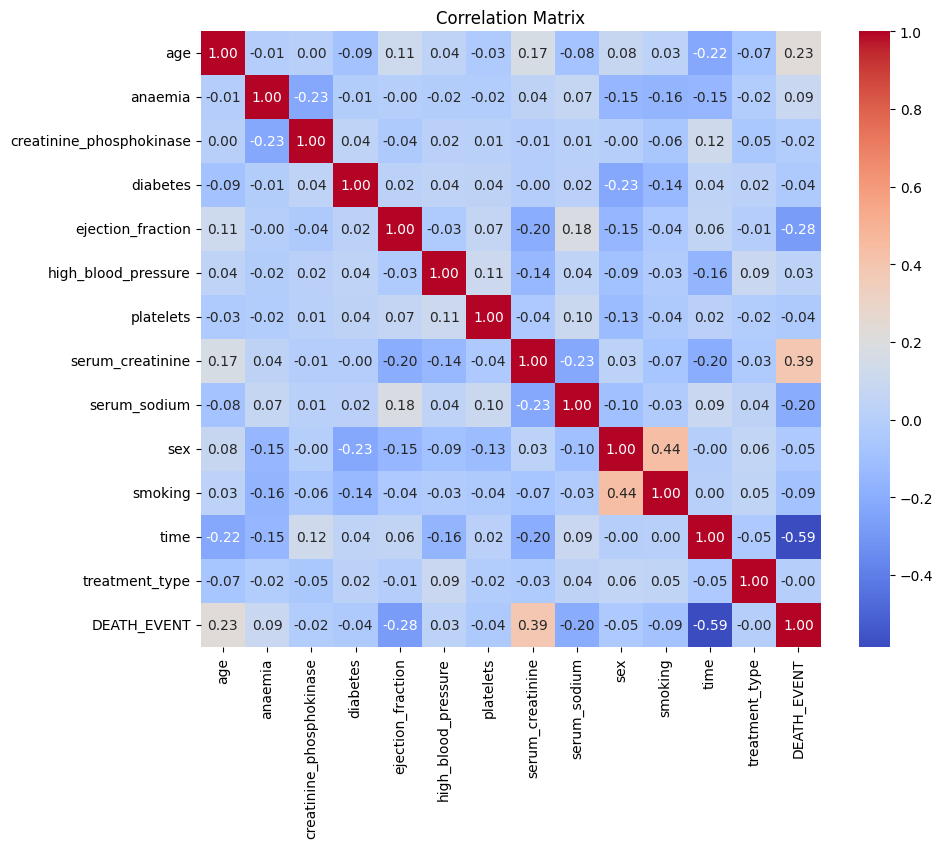

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#1. Correlation based feature selection
#-1 to 1
#col1-col2 corr=.8 highly correlated
#col1-col2 corr=-0.6 negative correlated
#col1-col2 corr=0.05 not correlated
#Cmbine x_smote and y_smote
# Concatenate X and y along columns (axis=1)
df_resampled = pd.concat([X_smote, y_smote], axis=1)
# Calculate correlation matrix
corr_matrix = df_resampled.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Correlation-based methods are typically used for numerical features and target variables.
correlations = X_smote.corrwith(y_smote) # correlation between X other DEATH_EVENT
print(correlations)
# Absolute correlations
correlations = correlations.abs()
print(correlations)

age                         0.226217
anaemia                     0.089061
creatinine_phosphokinase   -0.019869
diabetes                   -0.040238
ejection_fraction          -0.280349
high_blood_pressure         0.031199
platelets                  -0.036747
serum_creatinine            0.387410
serum_sodium               -0.202878
sex                        -0.045865
smoking                    -0.087235
time                       -0.586730
treatment_type             -0.002194
dtype: float64
age                         0.226217
anaemia                     0.089061
creatinine_phosphokinase    0.019869
diabetes                    0.040238
ejection_fraction           0.280349
high_blood_pressure         0.031199
platelets                   0.036747
serum_creatinine            0.387410
serum_sodium                0.202878
sex                         0.045865
smoking                     0.087235
time                        0.586730
treatment_type              0.002194
dtype: float64


In [ ]:
# Sort correlations in descending order
correlations = correlations.sort_values(ascending=False)
print(correlations)

time                        0.586730
serum_creatinine            0.387410
ejection_fraction           0.280349
age                         0.226217
serum_sodium                0.202878
anaemia                     0.089061
smoking                     0.087235
sex                         0.045865
diabetes                    0.040238
platelets                   0.036747
high_blood_pressure         0.031199
creatinine_phosphokinase    0.019869
treatment_type              0.002194
dtype: float64


In [ ]:
# Select the top n most correlated features
n = 5  # Adjust the number of features you want to select
selected_features = correlations.head(n).index.to_list()
print("Selected features based on correlation with target variable:")
print(selected_features)

Selected features based on correlation with target variable:
['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']


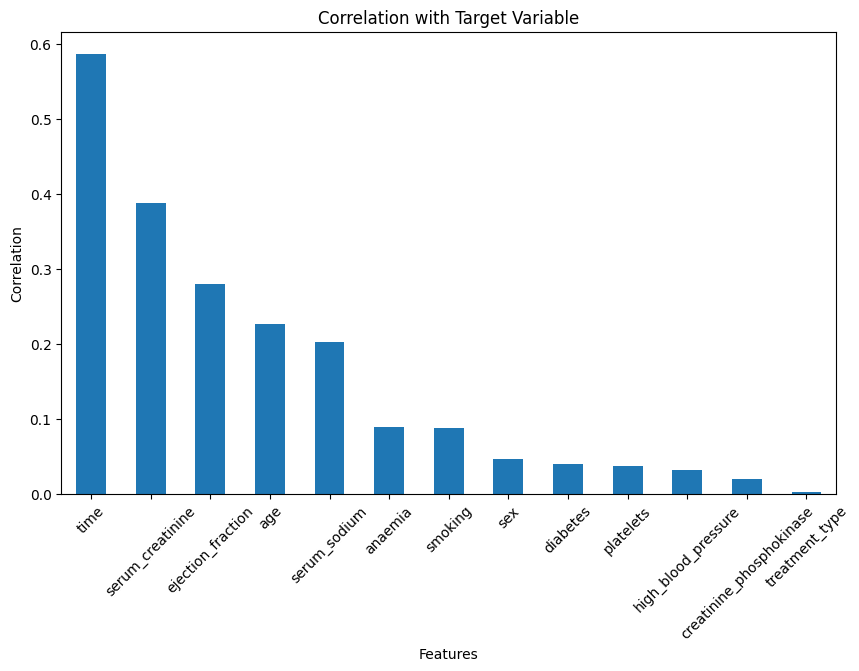

In [ ]:
# Plot correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Statistical : ANOVA, Chi, Mutual Info, Variance Threshold
#SelectKBest method - Feature selection based on scoring func - ANOVA f_classif, chi
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=5)
X_anova = k_best.fit_transform(X_smote, y_smote)
k_best.get_support()
selected_features = k_best.get_support(indices=True)
print("Selected Features:", selected_features)
print("Feature Ranking:", k_best.scores_)

Selected Features: [ 0  4  7  8 11]
Feature Ranking: [2.17893809e+01 3.23008588e+00 1.59546473e-01 6.55179404e-01
 3.44611581e+01 3.93634297e-01 5.46285274e-01 7.13425696e+01
 1.73421732e+01 8.51655215e-01 3.09801102e+00 2.12090531e+02
 1.94545034e-03]


In [ ]:
# SelectKBest with chi-squared
from sklearn.feature_selection import SelectKBest, chi2
k_best_chi2 = SelectKBest(score_func=chi2, k=5)
X_chi2 = k_best_chi2.fit_transform(X_smote, y_smote)
print("Selected Features (Chi-squared):")
print("Selected Features:", X_chi2)
print("Number of Selected Features:", X_chi2.shape[1])
print("List of Selected Features:", k_best_chi2.get_support(indices=True))

Selected Features (Chi-squared):
Selected Features: [[0.64814815 0.11764706 0.875      0.         0.        ]
 [0.27777778 0.47058824 0.375      0.         0.00711744]
 [0.46296296 0.47058824 0.5        1.         0.01067616]
 ...
 [0.3059001  0.33972775 0.36509716 0.         0.22317287]
 [0.29893627 0.45937985 0.57205994 0.         0.24961269]
 [0.42008986 0.64535562 0.3317929  0.         0.09061576]]
Number of Selected Features: 5
List of Selected Features: [ 0  4  7 10 11]


In [ ]:
#mutual info
from sklearn.feature_selection import SelectKBest, mutual_info_classif
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=5)  # Adjust 'k' based on your preference
X_mi = k_best_mi.fit_transform(X_smote, y_smote)
print("List of Selected Features:", k_best_mi.get_support(indices=True))

List of Selected Features: [ 0  4  7  8 11]


In [ ]:
# Feature Selection based on VarianceThreshold
#Removes features with no or low variance.
#that removes features with low variance, under the assumption that low variance features have little predictive power
#threshold = 0.3
#Does not look into target variable, consider only features
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=0.1)
X_var = var_selector.fit_transform(X_smote)
print("Number of Selected Features:", X_var.shape[1])

# Get the computed threshold values
threshold_values = var_selector.variances_
print("Threshold Values:", threshold_values)
print("List of Selected Features:", var_selector.get_support(indices=True))

# Get the selected features
selected_features = X_smote.columns[var_selector.get_support()]

# Show selected features
print("Selected Features:")
print(selected_features)

Number of Selected Features: 6
Threshold Values: [0.03977492 0.24780994 0.04646626 0.23980199 0.04905849 0.22436846
 0.03505192 0.0424129  0.02616393 0.23359582 0.20408163 0.07332859
 1.25982795]
List of Selected Features: [ 1  3  5  9 10 12]
Selected Features:
Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'treatment_type'],
      dtype='object')


In [ ]:
#correlation based feature selection - numerical, not suitable for categorical
#ANOVA - numberical features and categorical label
#Chi2 - categorical features and categorical label
#mutual info - mixed type , linear non linear relationship
#variance threshold - low var features remove numerical

###Dimensionality Reduction


In [ ]:
#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_var)
print(X_pca.shape)
X_pca

(406, 3)


array([[ 0.54138166, -0.28981336,  0.27100513],
       [-1.50028836, -0.49527887,  0.03954612],
       [-0.47717321, -0.99769383,  0.08265881],
       ...,
       [ 1.44714586,  0.5756256 , -0.76457063],
       [-1.50028836, -0.49527887,  0.03954612],
       [ 1.51461724,  0.79060776,  0.8477187 ]])

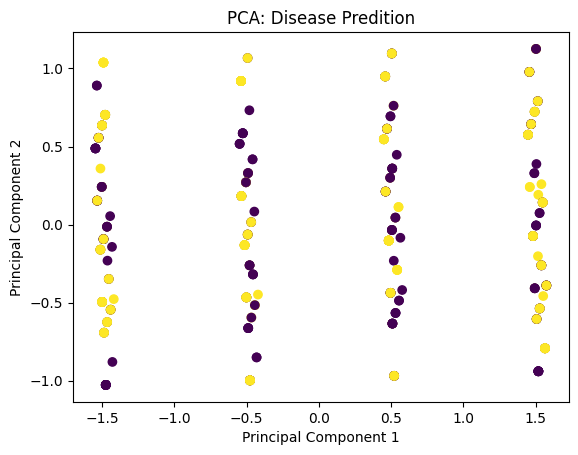

In [ ]:
# Plot the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_smote, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Disease Predition')
plt.show()

In [ ]:
#TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce to 3 dimensions
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_var)
print(X_tsne.shape)
X_tsne


(406, 3)


array([[ 22.114761 ,  25.18901  ,  28.323183 ],
       [-42.133198 ,  19.239243 ,  14.631904 ],
       [-26.215998 ,  33.492973 , -11.8871975],
       ...,
       [ 28.87576  , -24.149832 ,   9.880148 ],
       [-40.617172 ,  20.415894 ,  22.895489 ],
       [ 26.228483 ,   3.8679059,  -4.814807 ]], dtype=float32)

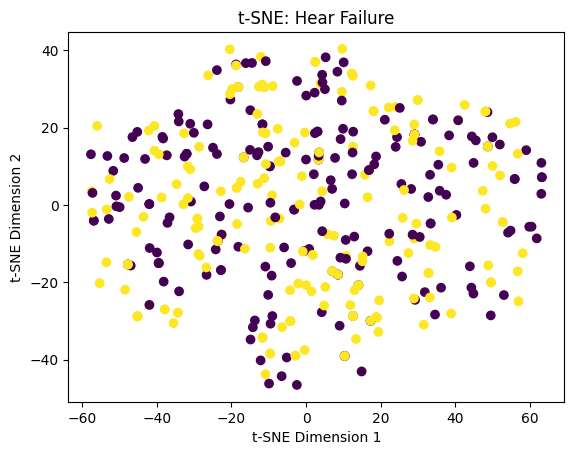

In [ ]:
# Plot the reduced data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_smote, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE: Hear Failure')
plt.show()

###Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# X_var: Features, y_smote: Labels
#80%:20%
#406 - 80% - 324 samples for training
#406 - 20% - 82  samples for testing
X_train, X_test, y_train, y_test = train_test_split(X_var, y_smote, test_size=0.2, random_state=0,stratify = y_smote)
#X_train -  (324, 6)
#y_train -  (324, )
#X_test -  (82, 6)
#y_test -  (82, )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.value_counts())

(324, 6)
(324,)
(82, 6)
(82,)
DEATH_EVENT
1    162
0    162
Name: count, dtype: int64
